# Identification
Please indicate your name

Student 1: Andrea Cosentino

Student 2: Andrei Aralov

# Practical work 4: Frequency filtering, color

In [2]:
import numpy as np
from numpy.fft import fft2,ifft2,fftshift,ifftshift
import matplotlib.pyplot as plt
from PIL import Image

def imshow(I,title=None,size=500):
    """ display an image with a specific size """
    plt.figure(figsize=(size//80,size//80))
    plt.gray()
    plt.imshow(I)
    if title: plt.title(title)
    plt.show()


## Exercise 1 - Frequency filtering

1. Compute than display the centered module of Fourier transform of `img/mandrill.png` (use functions seen in previous lessons). 

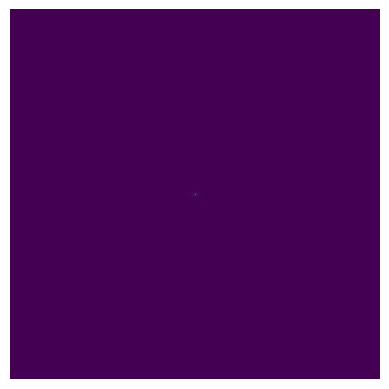

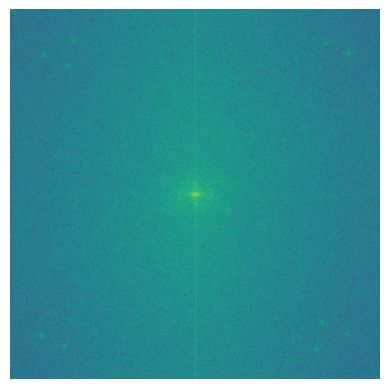

In [11]:
def openImage(fname):
    image = np.array(Image.open(fname))
    return image
def computeFT(I):
    """ Array -> Array[complex] """
    return fft2(I)

def toVisualizeFT(If):
    """ Array[complex] -> Array[float] """
    return np.abs(fftshift(If))
    
def toVisualizeLogFT(If):
    """ Array[complex] -> Array[float] """
    return np.log(1+toVisualizeFT(If))

image = openImage('img/mandrill.png')
imageFT = computeFT(image)
centeredFT = toVisualizeFT(imageFT)

plt.imshow(centeredFT)
plt.axis('off')
plt.show()
centeredFTLog = toVisualizeLogFT(imageFT)
plt.imshow(centeredFTLog)
plt.axis('off')
plt.show()


2. Write a function `idealLowPassFilter(n,m,fc)` returning an ideal low pass filter with frequency cutoff $f_c$ and size $n\times m$. Recall: this function set to 1 pixels at Euclidian distance $f_c$ from the center (null frequency).

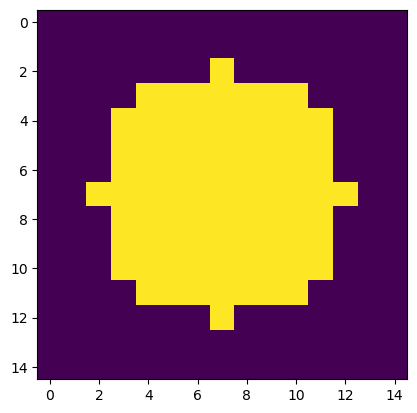

In [12]:
import math
def idealLowPassFilter(n,m,fc):
    LowPass = np.zeros((n,m))
    center_x, center_y = n // 2, m // 2 
    for i in range(n):
        for j in range(m):
            distance = math.sqrt((i - center_x)**2 + (j - center_y)**2)
            if distance <= fc:
                LowPass[i][j] = 1
    return LowPass
f = idealLowPassFilter(15,15,5)
plt.imshow(f)
plt.show()

3. Write a function `lowPass(I,fc)` performing a low pass filtering of an image $I$. The function should
 - compute the centered Fourier transform of $I$
 - multiply point-by-point the spectrum with the ideal low filter produced by `idealLowPassFilter()`
 - uncenter the filtered spectrum and apply the inverse Fourier transform (use function `ifft2()` from module `numpy.fft`)
 - return the real part of filtered image

In [13]:
def lowPass(I,fc):
    FT = computeFT(I)
    cFT = fftshift(FT)
    lowFilter = idealLowPassFilter(cFT.shape[0],cFT.shape[1],fc)
    cFT = cFT *lowFilter
    unCenter = ifftshift(cFT)
    unFT = ifft2(unCenter)
    return np.real(unFT)

4. Experiment this function on `img/mandrill.png` and `img/lena.jpg` with various values of cut off $f_c$.
 - give two effects that appears when $f_c$ decreases,
 - propose two applications of this filtering.


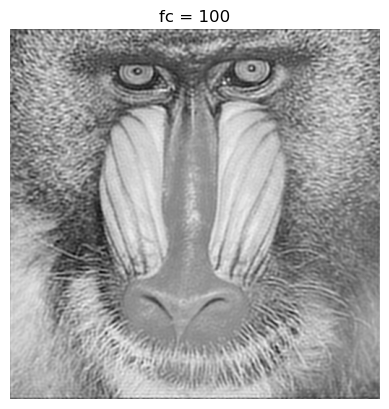

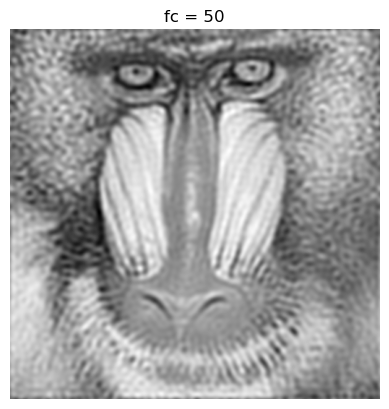

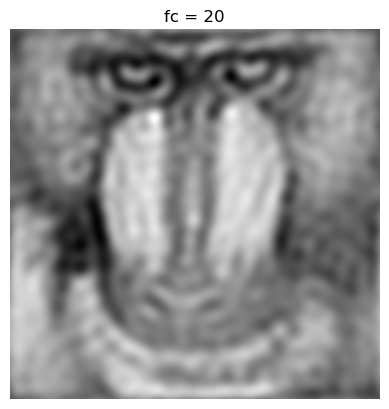

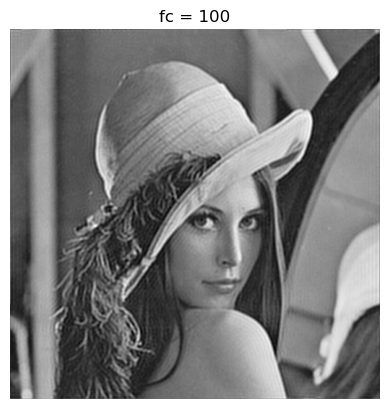

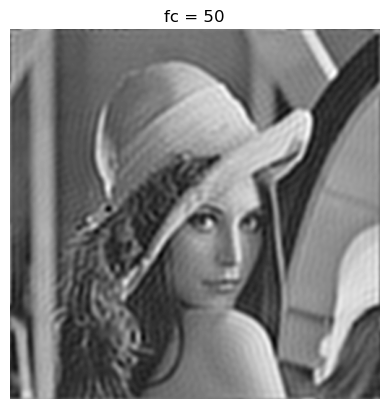

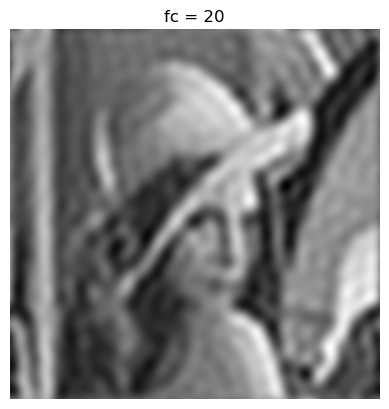

In [15]:
def showfilteredImage(img):
    for fc in [100, 50, 20]:    
        filt = lowPass(img, fc)
        plt.imshow(filt, cmap='gray')
        plt.title(f'fc = {fc}')
        plt.axis('off')
        plt.show()
image = Image.open('img/mandrill.png')
showfilteredImage(image)

image = Image.open('img/lena.jpg')
showfilteredImage(image)
# When f_c decreseas, high frequencies are cut out and low frequencies preserved
# We can use it in signal reconstruction and as an anti-aliasing filter

## Exercise 2 -  Linear filtering (convolution)

1. Given a kernel convolution of size $d\times d$, $d$ being odd. How many lines and columns should be added to each side of the image to apply this filter? The image is supposed surrounded by zero values.

[1,0,-1]
[1,0,-1]
[1,0,-1] 
Add 1 line above and 1 at the bottom. Add 1 column on the left and one on the right. 

In general, you add the integer part of d/2 lines and columns in the 4 directions.

2. Write a function `imagePad(I,h)` getting an image and a kernel, returning a new image padded with zeros according to question 1. It is not allowed to use a module implementing the padding.

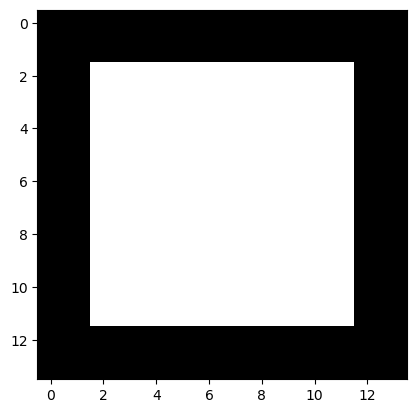

In [17]:
def imagePad(I,h):
    d = int(h.shape[0]/2)
    # n x m
    n = I.shape[0]
    m = I.shape[1]
    row = np.zeros((1,m))
    column = np.zeros((n+2*d,1))
    for i in range(d):
        I = np.vstack((row,I))
        I = np.vstack((I,row))
    for i in range(d):
        I = np.hstack((column,I))
        I = np.hstack((I,column))
    return I
padded_sample = imagePad(np.ones((10, 10)), np.ones((5, 5)))
plt.imshow(padded_sample, cmap='gray')
plt.show()

3. Write a function `conv2(I,h)` getting an image and a kernel and returning the convolution of $I$ by $h$. The function should return an image having the same shape than $I$. It is not allowed to use a module implementing the convolution.

In [18]:
def conv2(I,h):
    output = np.zeros_like(I)
    PadImg = imagePad(I,h)
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            temp = 0
            for k in range(h.shape[0]):
                for l in range(h.shape[1]):
                    temp += h[k][l] * PadImg[i+k][j+l]
            output[i][j] = temp
    return output

4. Try this function on mean filter of size $3\times3$, $5\times 5$ and $7\times 7$. Discuss the results.

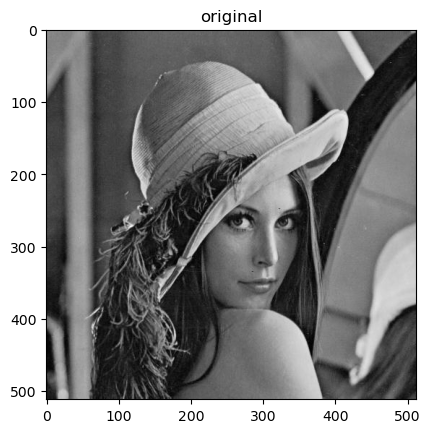

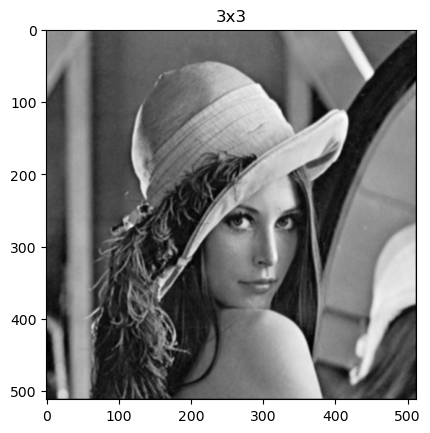

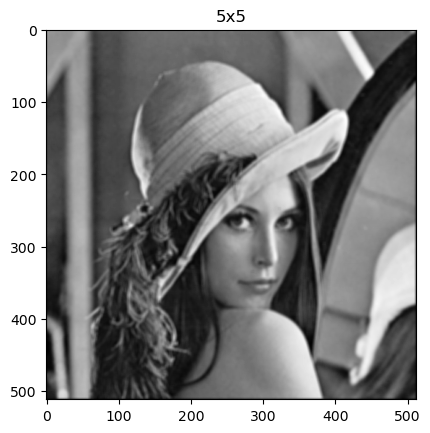

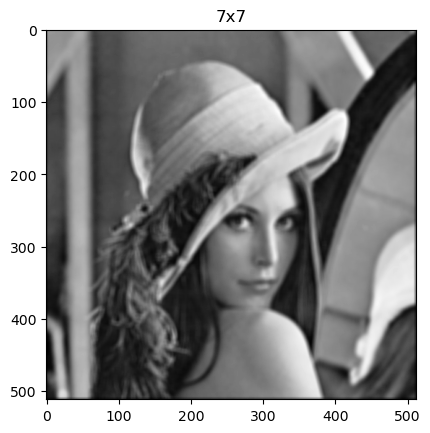

In [21]:
h = np.ones((3,3))/(3*3)
image = openImage('img/lena.jpg')
filterImg = conv2(image,h)
plt.title('original')
plt.imshow(image,cmap='gray')
plt.show()
plt.title('3x3')
plt.imshow(filterImg,cmap='gray')
plt.show()
h1 = np.ones((5,5))/(5*5)
filterImg = conv2(image,h1)
plt.title('5x5')
plt.imshow(filterImg,cmap='gray')
plt.show()
h2 = np.ones((7,7))/(7*7)
plt.title('7x7')
filterImg = conv2(image,h2)
plt.imshow(filterImg,cmap='gray')
plt.show()
# As we increase the filter dimension we lose detail, because we are doing the average of bigger portions.
# So the result is a smoother image.

5. Display the transfert function of these mean filters. For a better visualization, use the zero-padding technique to obtain a filter with a large size (for instance $256\times 256$). Use `imshow()` and `toVisualizeLogFT()`.

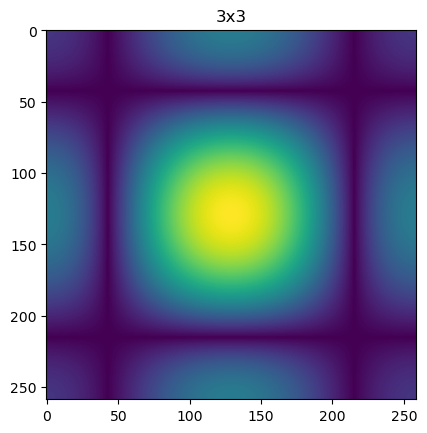

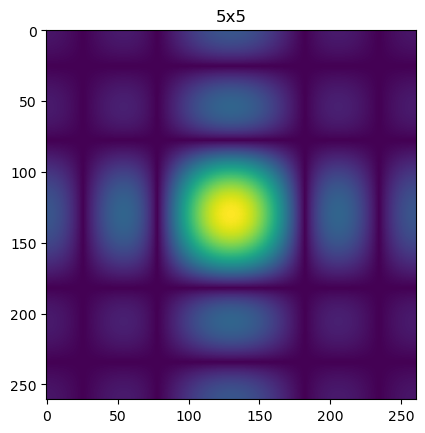

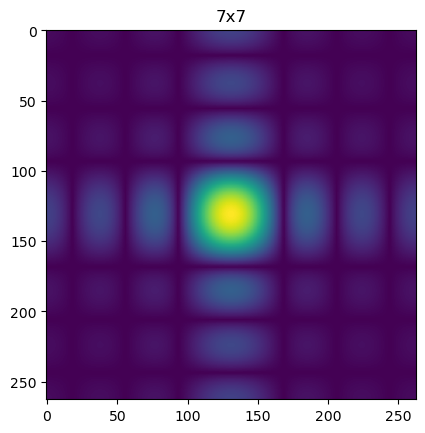

In [23]:
filterImgFt = computeFT(imagePad(h,np.zeros((256,256))))
plt.title('3x3')
plt.imshow(toVisualizeLogFT(filterImgFt))
plt.show()
plt.title('5x5')
filterImgFt = computeFT(imagePad(h1,np.zeros((256,256))))
plt.imshow(toVisualizeLogFT(filterImgFt))
plt.show()
plt.title('7x7')
filterImgFt = computeFT(imagePad(h2,np.zeros((256,256))))
plt.imshow(toVisualizeLogFT(filterImgFt))
plt.show()

6. Interpretation: what is the analytic expression of the transfert function of a mean filter? Is  it an ideal low pass filter?

The transfer function is the fourier transform, so $FT[h]$, substitute and you will find a geometric series. The mean filter isn't an ideal low pass filter.

7. Bonus question: perform the same study for the Gaussian kernel. Determine $\sigma$ in order to have filter of size $3\times3$, $5\times5$, and $7\times7$.

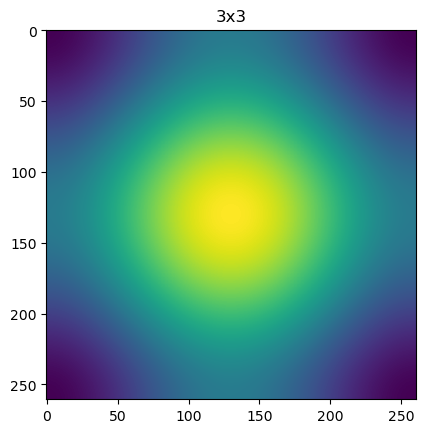

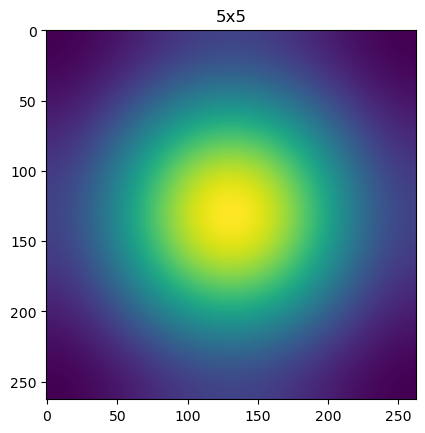

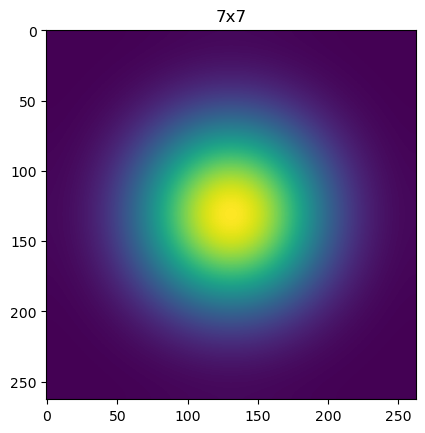

In [25]:
def gaussianKernel(sigma):
    """ double -> Array
        return a gaussian kernel of standard deviation sigma
    """
    n2 = int(np.ceil(3*sigma))
    x,y = np.meshgrid(np.arange(-n2,n2+1),np.arange(-n2,n2+1))
    kern = np.exp(-(x**2+y**2)/(2*sigma*sigma))
    return  kern/kern.sum()
### your answer start below
sigma3 = 0.5
sigma5 = 0.7
sigma7 = 1

filterImgFt = computeFT(imagePad(gaussianKernel(sigma3),np.zeros((256,256))))
plt.title('3x3')
plt.imshow(toVisualizeLogFT(filterImgFt))
plt.show()

filterImgFt = computeFT(imagePad(gaussianKernel(sigma5),np.zeros((256,256))))
plt.title('5x5')
plt.imshow(toVisualizeLogFT(filterImgFt))
plt.show()

filterImgFt = computeFT(imagePad(gaussianKernel(sigma7),np.zeros((256,256))))
plt.title('7x7')
plt.imshow(toVisualizeLogFT(filterImgFt))
plt.show()

## Exercise 3: anti aliasing filtering

1. Give a code that subsamples of factor 2 (use function `subSample2()` given in TME3) the image `img/barbara.png`.

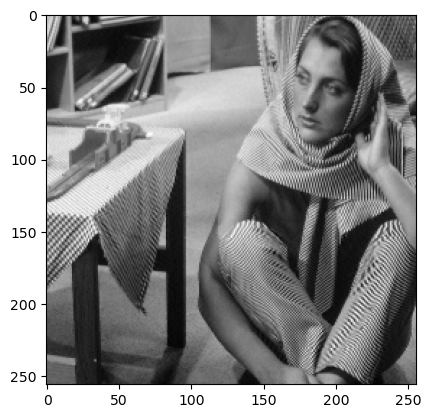

In [26]:
def subsample(image,factor):
    return image[::factor,::factor]
img = openImage('img/barbara.png')
subImg = subsample(img,2)
plt.imshow(subImg,cmap='gray')

2. Give a code that subsamples of factor 2 (use function `subSample2()`) the image `img/barbara.png` after applying an low pass filter (use `antiAliasingFilter()`). As comment, recall the principle of filtering in the frequency domain.

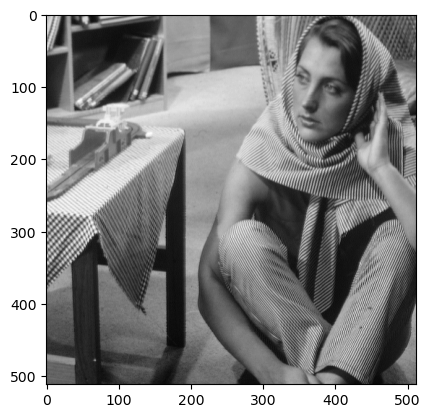

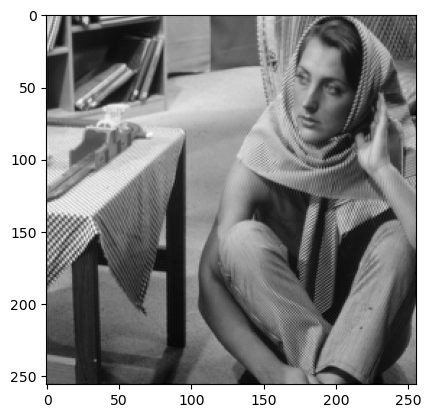

In [103]:
def antiAliasingFilter(n,m):
    """ int*int -> Array """
    n2, m2 = n//2, m//2
    rn, rm = n//4, m//4
    A = np.zeros((n, m))
    A[rn:rn+n2, rm:rm+m2] = 1
    return A
### your answer start below

plt.imshow(img,cmap='gray')
plt.show()
f = fftshift(fft2(img))
res = f*antiAliasingFilter(f.shape[0],f.shape[1])
res = ifft2(ifftshift(res)).real
plt.imshow(subsample(res,2),cmap='gray')
plt.show()

3. Describe and analyze the filtering of Barbara with and without the anti aliasing filter. What information is lost for the two filtered images ?

In [362]:
# We are losing the high frequencies, hence the details

## Exercise 4: color image
1. Read images `img/clown.bmp` and `img/clown_lumi.bmp` as two arrays named $I_1$ and $I_2$. Display these images and examine their shape. What difference there are between them?

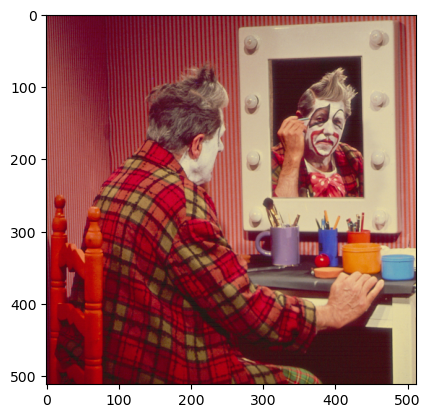

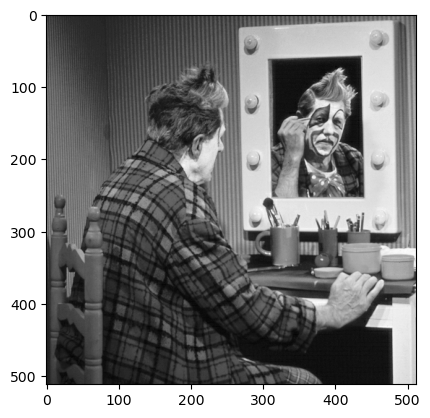

(512, 512, 3)
(512, 512)


In [27]:
I1 = openImage('img/clown.bmp')
I2 = openImage('img/clown_lumi.bmp')
plt.imshow(I1)
plt.show()
plt.imshow(I2,cmap='gray')
plt.show()
print(I1.shape)
print(I2.shape)
# the colored image has a 3 dimensional shape

2. The first image is an array of dimension 3. Explain the signification of each dimension. From this image create 3 images $I_R$, $I_G$, $I_B$ of dimension 2. Display these three images and explain what you see.

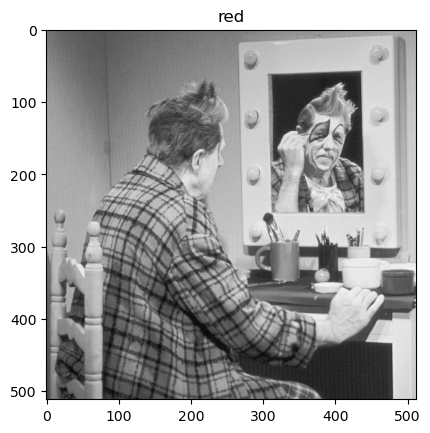

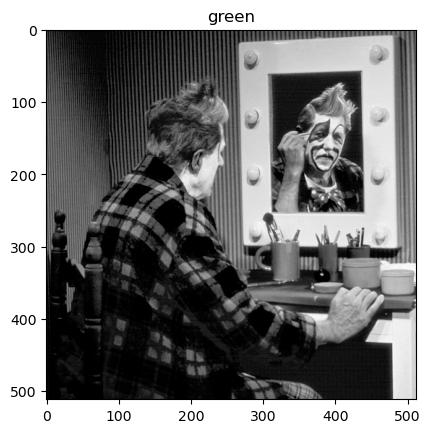

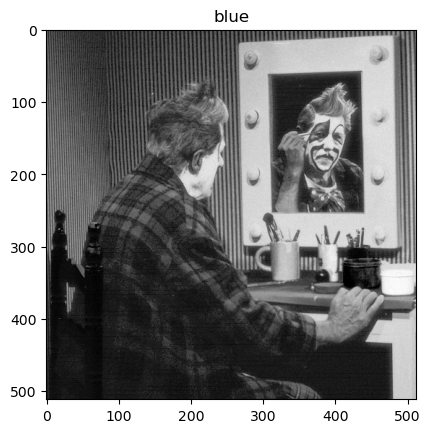

In [29]:
# The first two dimensions give the size of the image (length x width), the last dimension gives the color in the
# RGB format
Ir = I1[:,:,0]
plt.imshow(Ir,cmap='gray')
plt.title('red')
plt.show()
Ig = I1[:,:,1]
plt.title('green')
plt.imshow(Ig,cmap='gray')
plt.show()
Ib = I1[:,:,2]
plt.title('blue')
plt.imshow(Ib,cmap='gray')
plt.show()

3. Create a new image $I_3$ of dimensions 3, the first dimension contains the value of $I_R$, the second the value of $I_B$ and the third the values of $I_G$. Try another combinations. Remark: color images are better handled by `imshow()` if pixel values range in $[0,1]$.

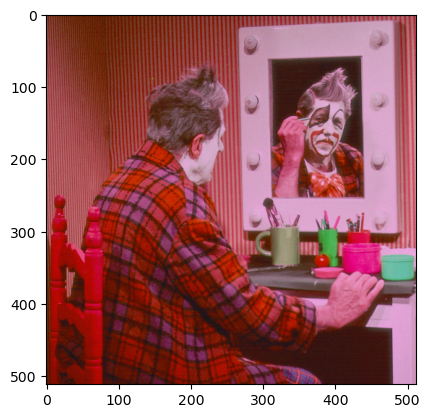

In [30]:
I3 = np.hstack([Ir,Ib,Ig])
I3 = np.zeros_like(I1)
I3[:, :, 0] = I1[:, :, 0]
I3[:, :, 1] = I1[:, :, 2]
I3[:, :, 2] = I1[:, :, 1]

plt.imshow(I3)
plt.show()

4. Write a code that allows the see the first channel with red color scales, the second channel in green color scales, and the blue channel in blue color scales.

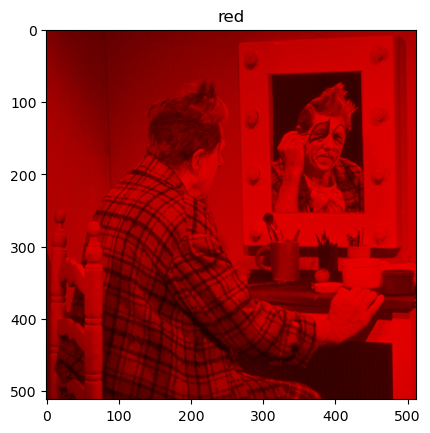

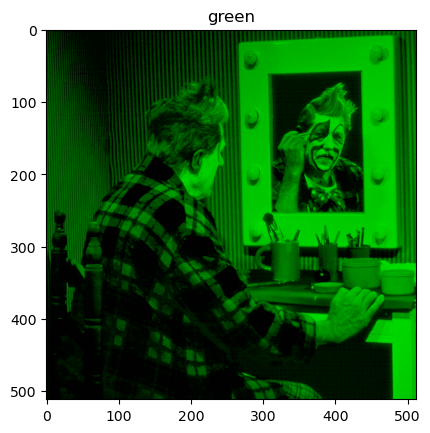

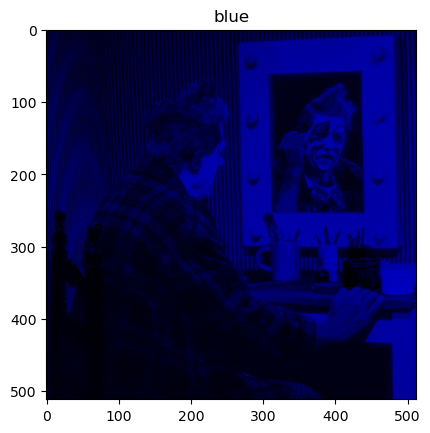

In [31]:
red_image = np.zeros_like(I1)
green_image = np.zeros_like(I1)  
blue_image = np.zeros_like(I1)  


red_image[:, :, 0] = Ir
green_image[:, :, 1] = Ig 
blue_image[:, :, 2] = Ib

plt.imshow(red_image)
plt.title('red')
plt.show()
plt.imshow(green_image)
plt.title('green')
plt.show()
plt.imshow(blue_image)
plt.title('blue')
plt.show()